## 1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('premiums_young_with_gr.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [3]:
df.shape

(20096, 14)

In [4]:
df.columns = df.columns.str.replace(' ',"_").str.lower()
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


## 2. EDA and Data Cleaning

### 2.1 Handle Missing Values

In [5]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

### 2.2 Handle Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


### 2.3 Data Cleaning: number_of_dependants
-We can see some negative values in number_of_dependants. We can replace them with positive numbers

In [10]:
df[df['number_of_dependants']<0].shape

(22, 14)

In [11]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

In [12]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

### 2.4 Numeric Columns

#### 2.4.1 Univariate Analysis: Numeric Columns

#### Box plots for numeric columns

In [13]:
df.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
genetical_risk            int64
dtype: object

In [14]:
numeric_cols = df.select_dtypes(include=['float64','Int64']).columns
numeric_cols

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

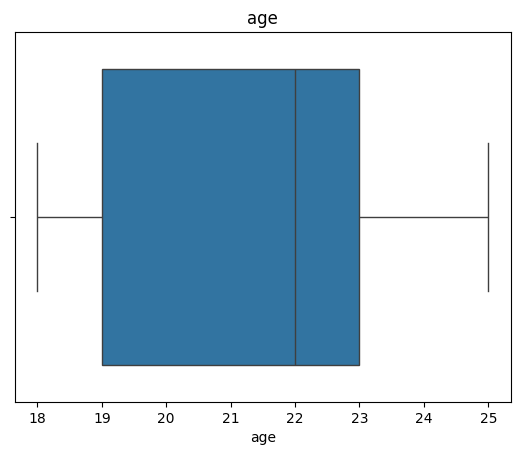

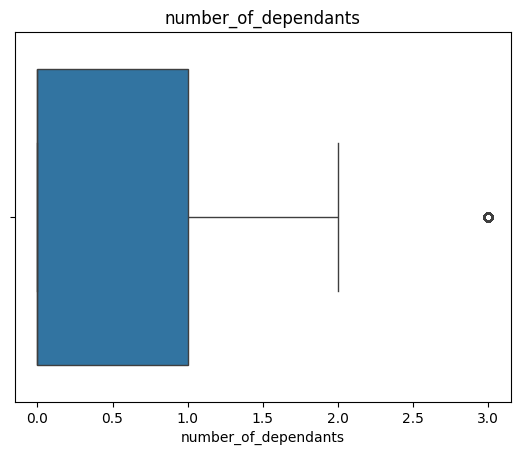

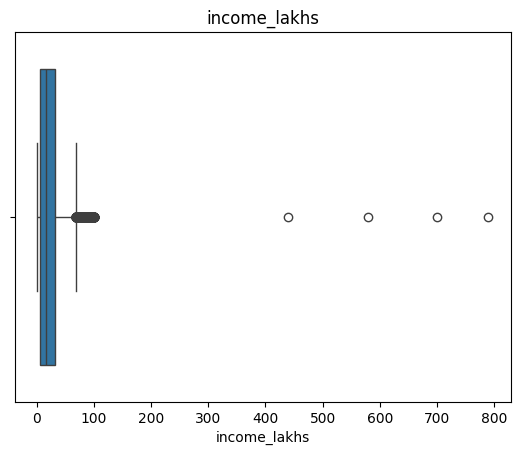

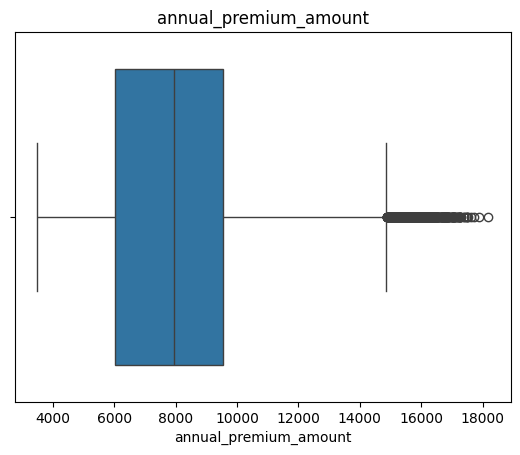

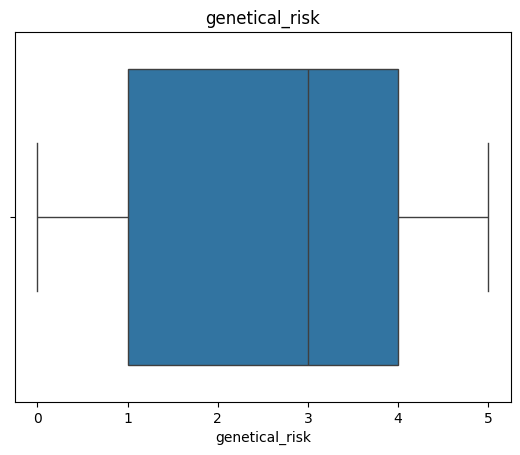

In [15]:
for col in numeric_cols:
    sns.boxplot(data = df, x = col)
    plt.title(col)
    plt.show()

#### 2.4.2 Outlier Treatment: Age Column

In [16]:
df[df['age']>100].shape

(0, 14)

In [17]:
df[df['age']>100]['age'].unique()

array([], dtype=int64)

In [18]:
df1 = df[df['age']<=100].copy()
print(df1.shape)
df1['age'].describe()

(20090, 14)


count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

#### 2.4.3 Outlier Treatment: Income Column

In [19]:
df['income_lakhs'].describe()

count    20090.000000
mean        22.510851
std         23.420493
min          1.000000
25%          6.000000
50%         16.000000
75%         31.000000
max        790.000000
Name: income_lakhs, dtype: float64

In [20]:
def get_iqr_bound(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return lower_bound, upper_bound

In [21]:
lower, upper = get_iqr_bound(df1['income_lakhs'])
lower,upper

(-31.5, 68.5)

In [22]:
df1[df1['income_lakhs']>upper].shape

(1295, 14)

- There will be many legimate records beyond the upper limit so we decide to use the quantile bound

In [23]:
quantile_threshold = df1['income_lakhs'].quantile(0.999)
quantile_threshold

np.float64(100.0)

In [24]:
df1[df1['income_lakhs']>quantile_threshold].shape

(4, 14)

In [25]:
df2  = df1[df1['income_lakhs']<=quantile_threshold].copy()
df2.shape

(20086, 14)

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')


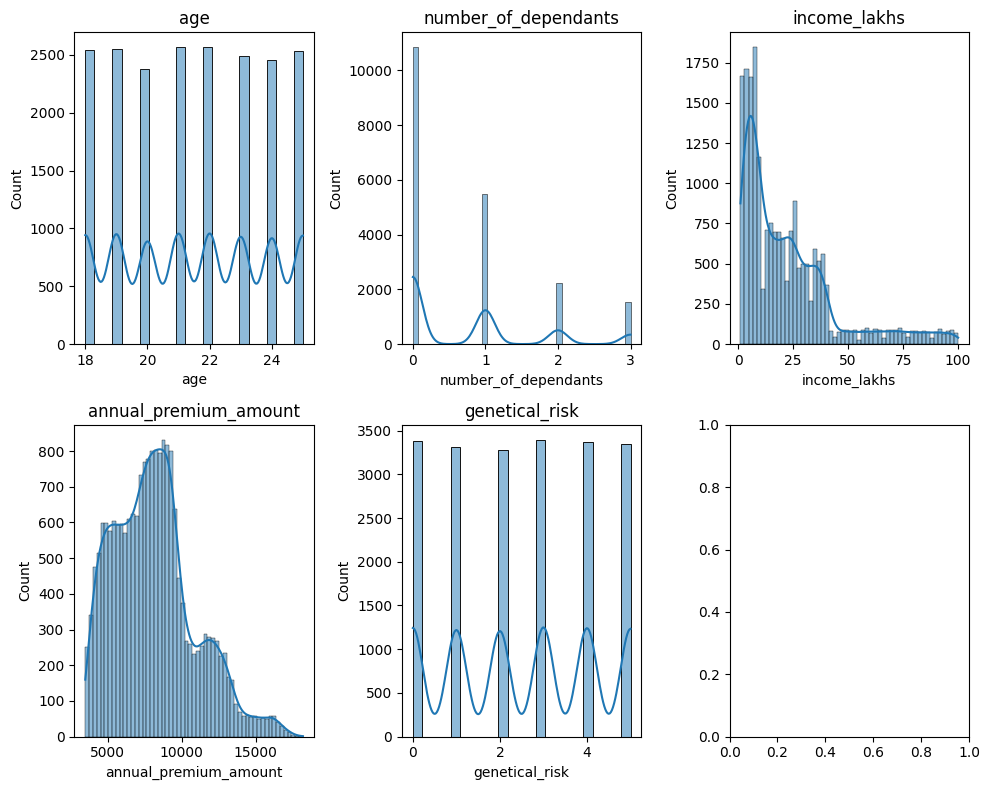

In [26]:
print(numeric_cols)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))  # Adjust the size as necessary

for i, column in enumerate(numeric_cols):
    ax = axs[i//3, i%3]  # Determines the position of the subplot in the grid
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [27]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


#### 2.4.4 Bivariate Analysis: Numeric Columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'genetical_risk'], dtype='object')


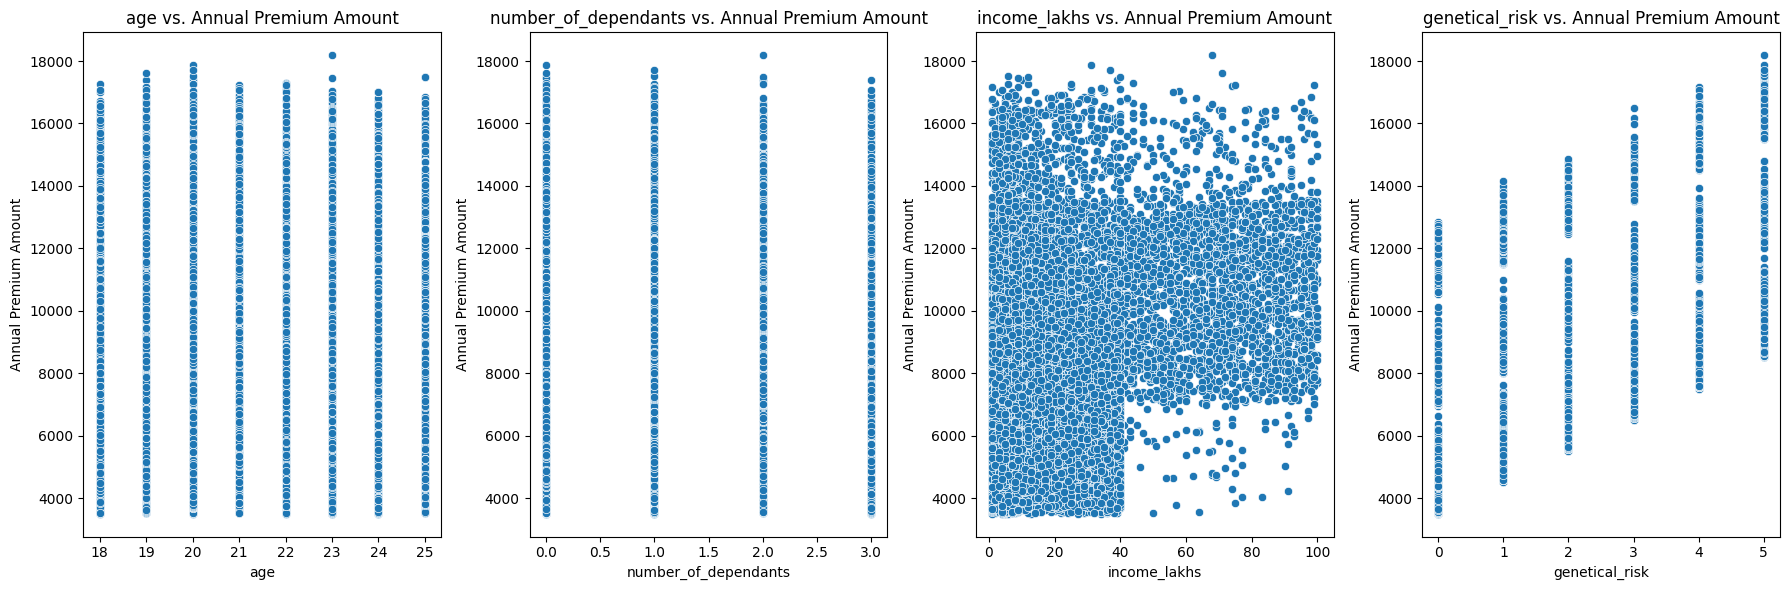

In [28]:
numerical_features =  numeric_cols.drop('annual_premium_amount')
print(numerical_features)

fig, axes = plt.subplots(1, len(numerical_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numerical_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

### 2.5 Categorical Columns

In [29]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [30]:
for col in cat_cols:
    print(f"{col} :- {df2[col].unique()}")

gender :- ['Male' 'Female']
region :- ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status :- ['Unmarried' 'Married']
bmi_category :- ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status :- ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status :- ['Self-Employed' 'Freelancer' 'Salaried']
income_level :- ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history :- ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan :- ['Silver' 'Bronze' 'Gold']


#### 2.5.1 Making Smoking_status feature Uniform

In [31]:
df2['smoking_status'] = df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
})
df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

#### 2.5.2 Univarate Analysis

In [32]:
pct = df2['gender'].value_counts(normalize=True)*100
pct

gender
Male      55.038335
Female    44.961665
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

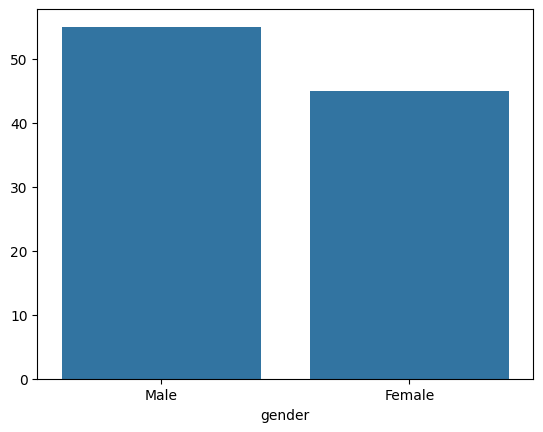

In [33]:
sns.barplot(x=pct.index, y = pct.values)

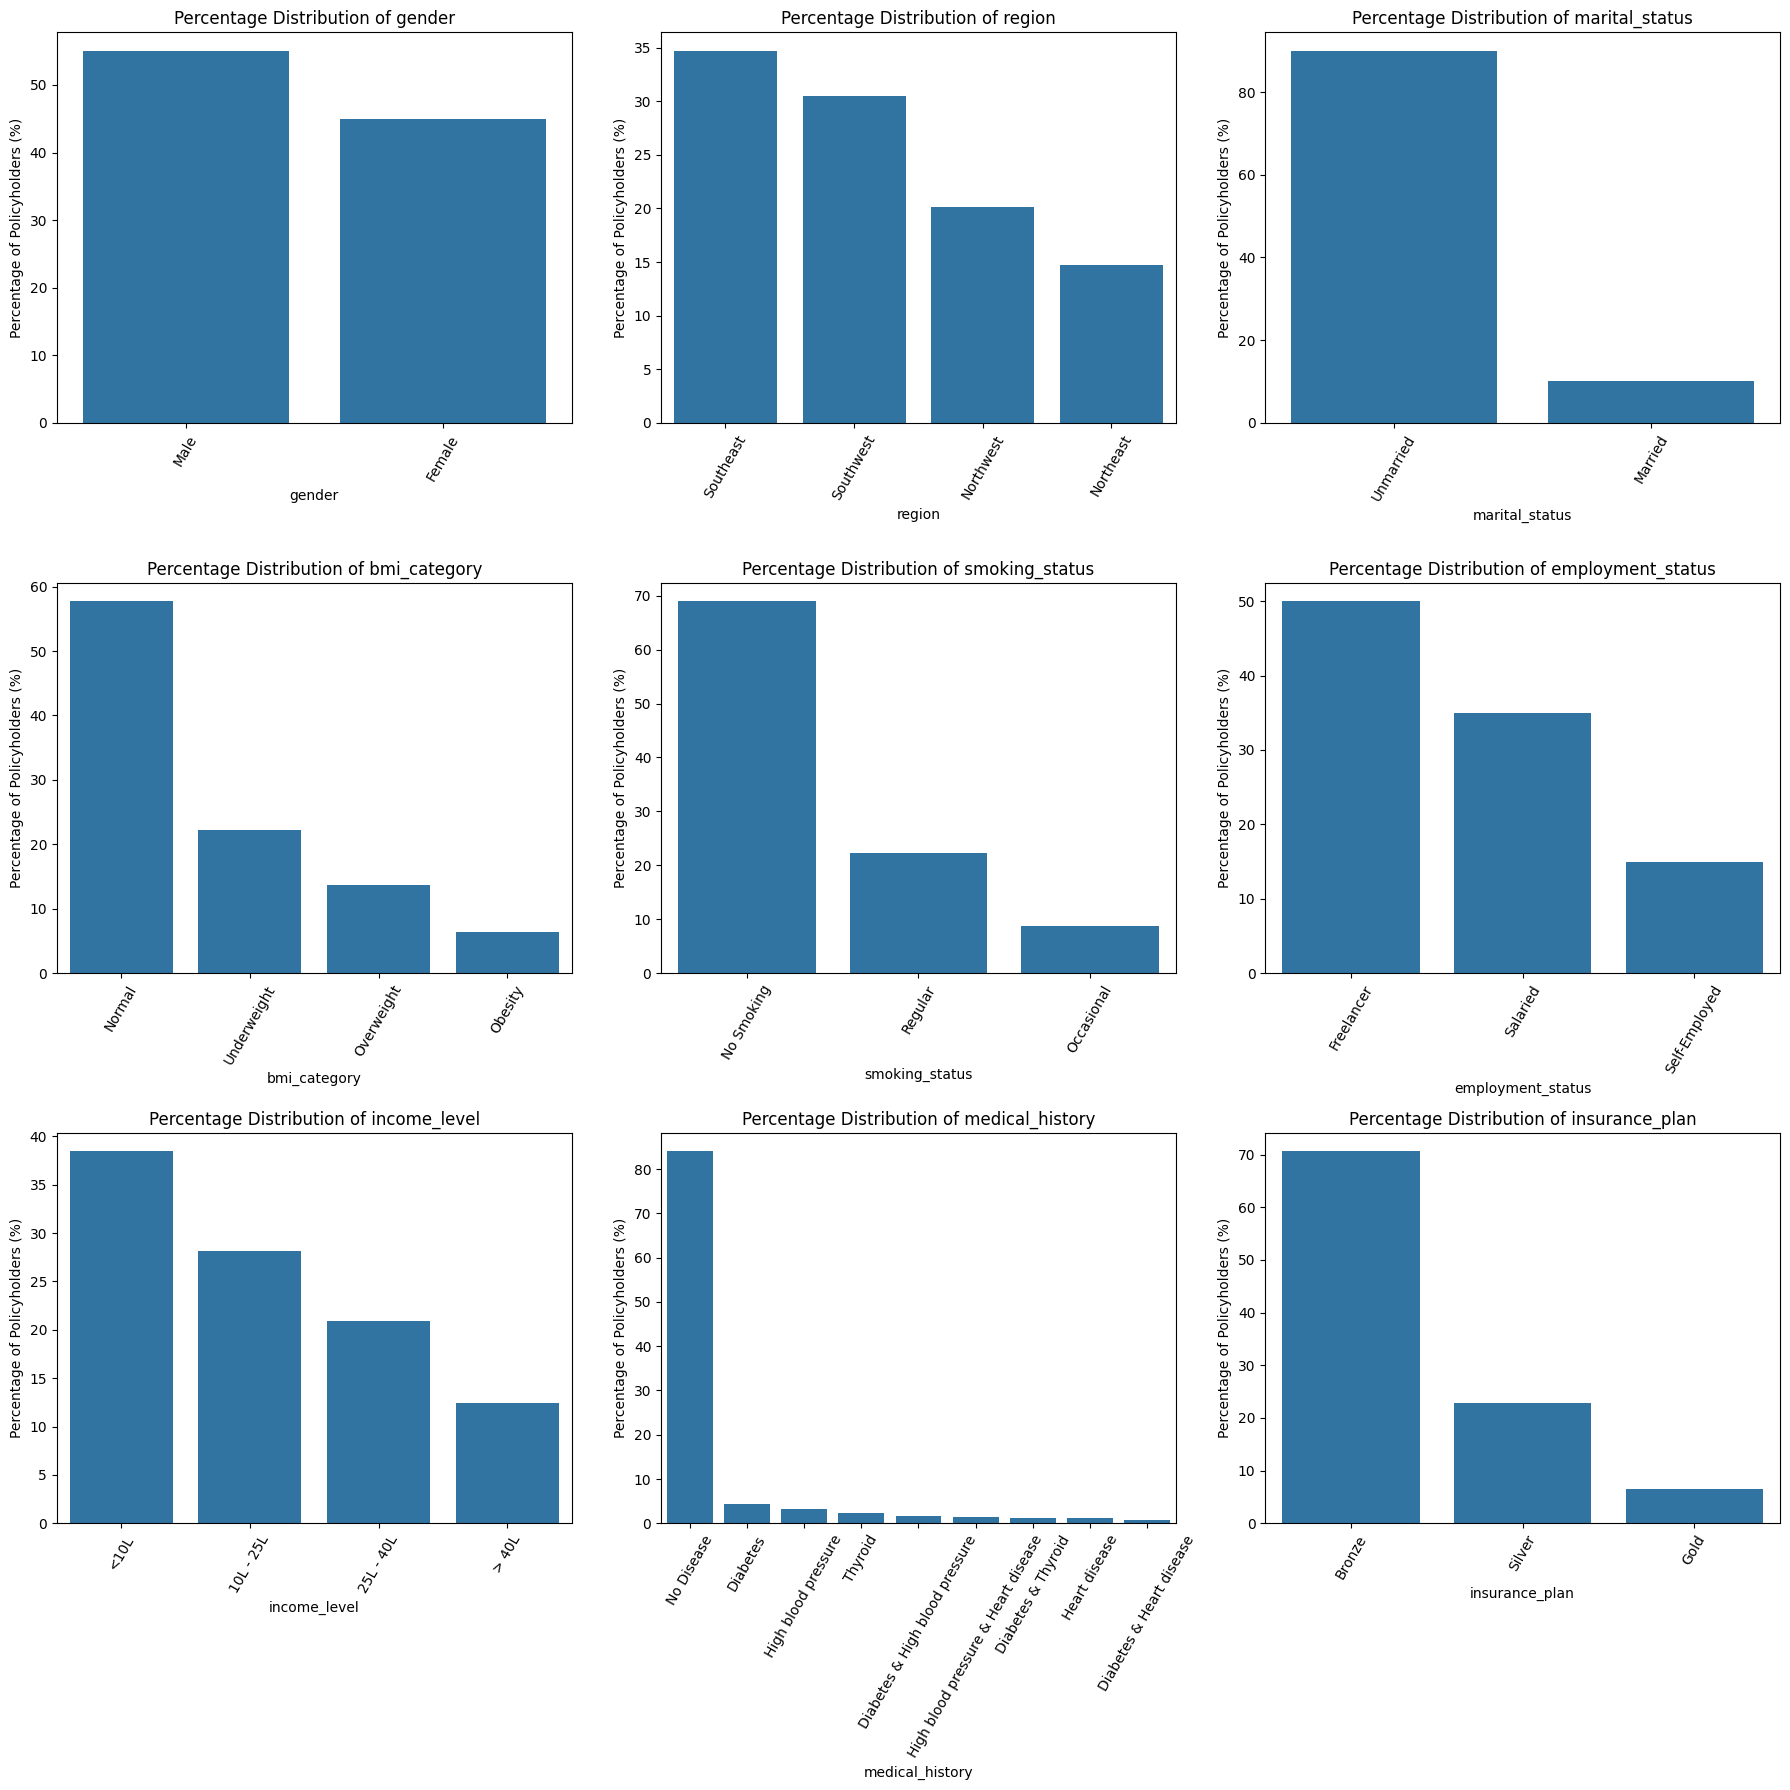

In [34]:

fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, cat_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.tick_params(axis='x', rotation=60)
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

#### 2.5.3 Bivariate Analysis

In [35]:
crosstab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


<Axes: xlabel='income_level'>

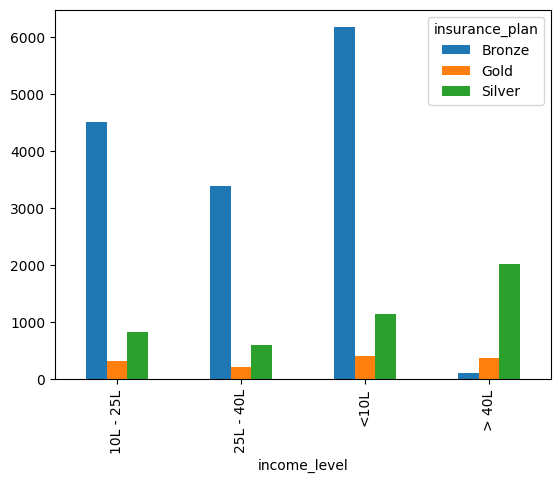

In [36]:
crosstab.plot(kind='bar')

<Axes: xlabel='insurance_plan', ylabel='income_level'>

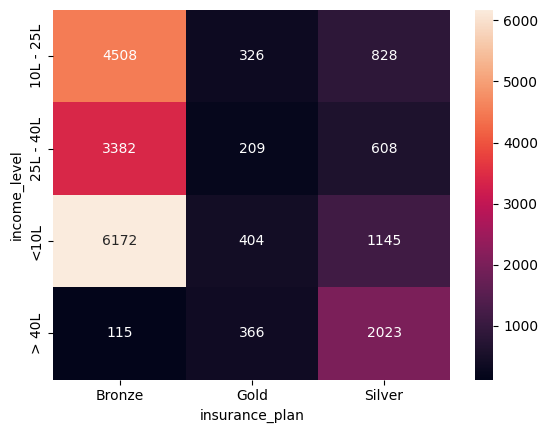

In [37]:
sns.heatmap(crosstab,annot=True,fmt='d')

## 3. Feature Engineering

In [38]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [39]:
df['medical_history'].unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

### 3.1 Medical History to Risk Score

In [40]:
risk_score = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

In [41]:
df2[['disease1','disease2']] = df['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
16491,23,Male,Northwest,Unmarried,1,Underweight,No Smoking,Salaried,<10L,8,No Disease,Bronze,3984,0,no disease,None
18240,21,Male,Southeast,Unmarried,0,Obesity,No Smoking,Freelancer,25L - 40L,29,No Disease,Bronze,6952,2,no disease,None
12543,20,Male,Northeast,Unmarried,0,Overweight,No Smoking,Self-Employed,> 40L,92,No Disease,Silver,8142,0,no disease,None
13847,23,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,20,No Disease,Bronze,7002,3,no disease,None
11380,21,Female,Southeast,Unmarried,1,Normal,No Smoking,Freelancer,> 40L,93,No Disease,Gold,11994,1,no disease,None


In [42]:
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')
df2['total_rist_score'] = 0
df2.sample(2)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_rist_score
3136,18,Male,Southeast,Unmarried,0,Overweight,No Smoking,Freelancer,> 40L,48,No Disease,Silver,10744,3,no disease,none,0
18168,25,Male,Southwest,Unmarried,0,Underweight,No Smoking,Salaried,> 40L,57,No Disease,Silver,9017,1,no disease,none,0


In [43]:
for disease in ['disease1','disease2']:
    df2['total_rist_score'] += df2[disease].map(risk_score)
    
df2['total_rist_score'].describe()

count    20086.000000
mean         1.289057
std          3.220220
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.000000
Name: total_rist_score, dtype: float64

In [44]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_rist_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2['normalized_rist_score'] = scaler.fit_transform(df2[['total_rist_score']])

df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_rist_score,normalized_rist_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0,0.000000


### 3.2 Insurance Plan Label Encoding

In [46]:
df2['insurance_plan'].unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [47]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1,'Silver':2, 'Gold':3})
df2['insurance_plan'].unique()

array([2, 1, 3])

### 3.3 Income Level Label Encoding

In [48]:
df2['income_level'].unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [49]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L':2, '> 40L':4, '25L - 40L':3})
df2['income_level'].unique()

array([4, 1, 2, 3])

### 3.3 One Hot Encoding

In [50]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0


## 4. Feature Selection

In [51]:
df4 = df3.drop(['medical_history','disease1', 'disease2', 'total_rist_score'],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_rist_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


## 5. Check Multicolinearity

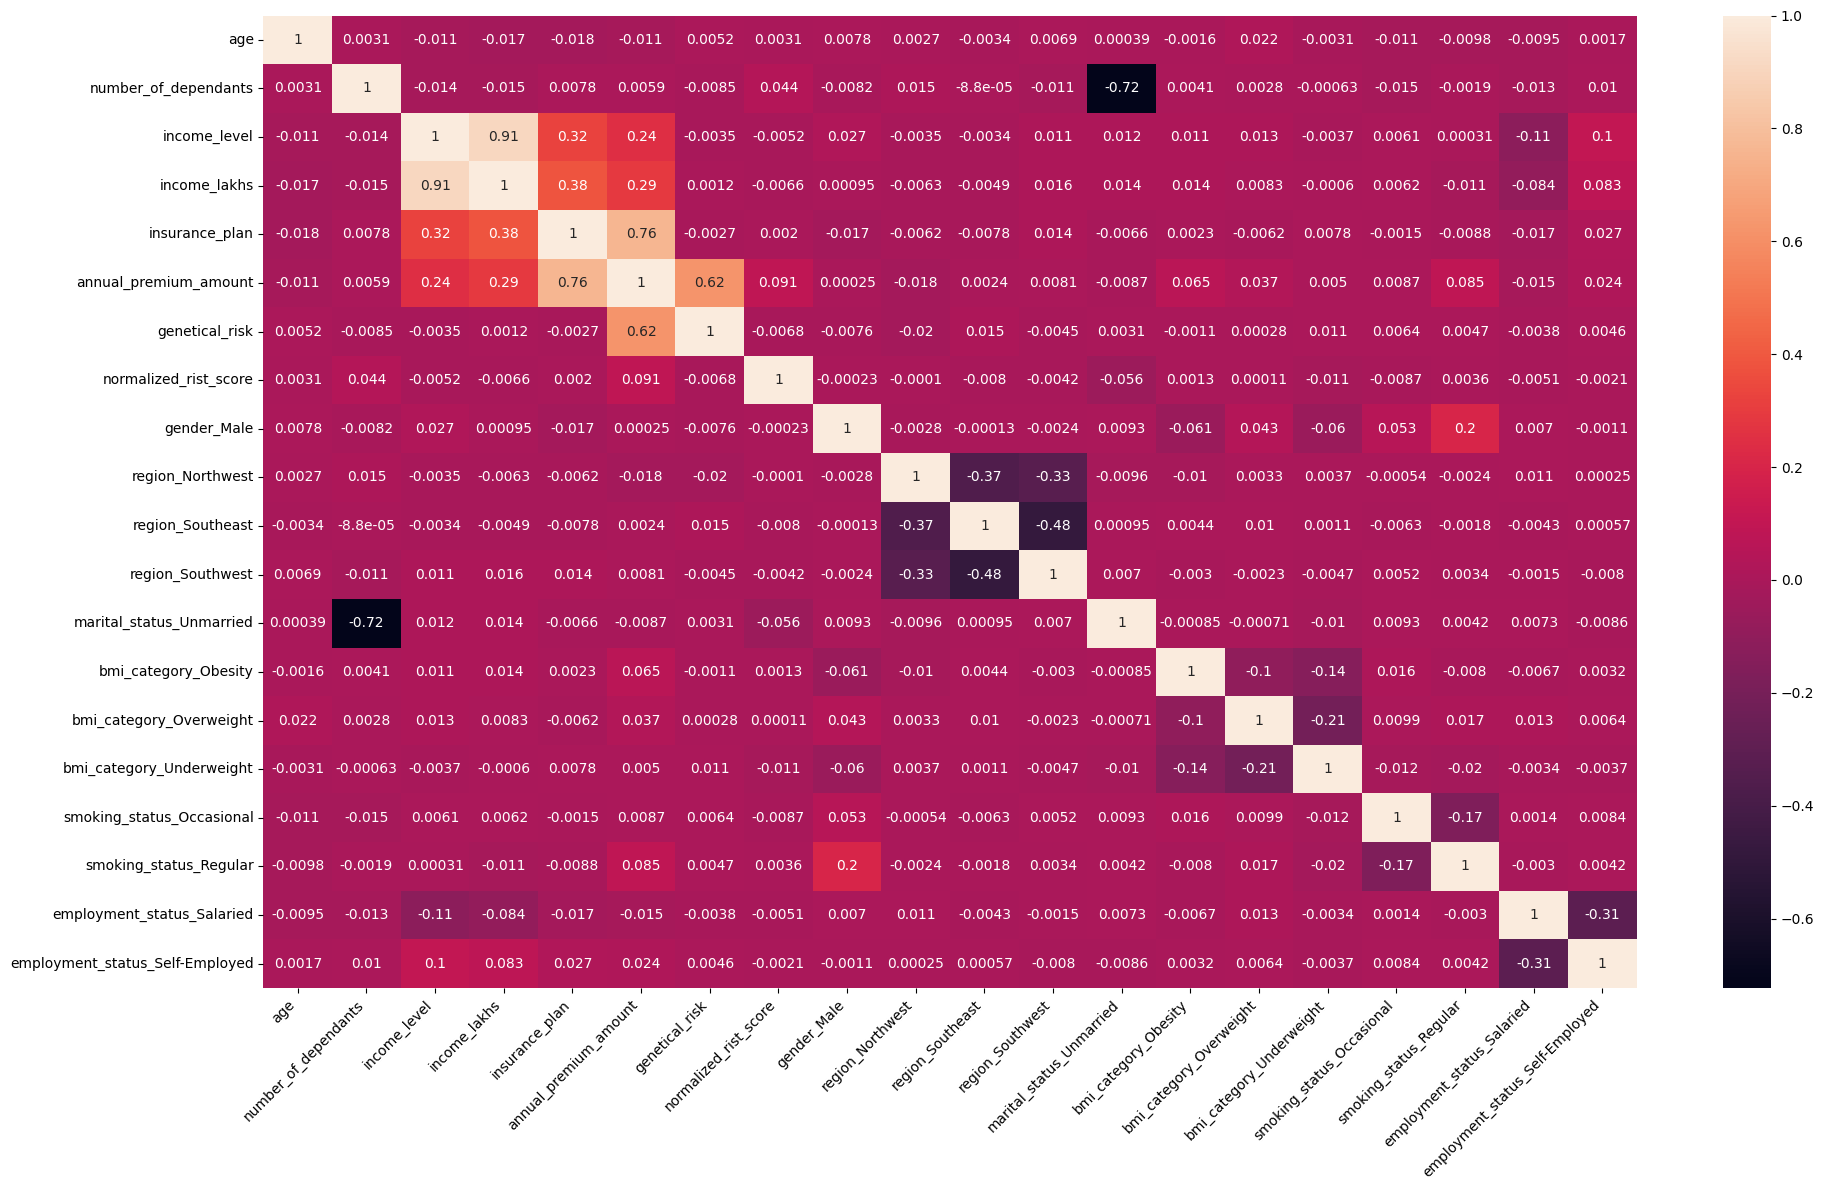

In [52]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [53]:
X = df4.drop(columns=['annual_premium_amount'],axis=1)
y = df4['annual_premium_amount']


In [54]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan', 'genetical_risk']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_rist_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [56]:
calculate_vif(X)

,Column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_rist_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [57]:
calculate_vif(X.drop(columns=['income_level'],axis=1))

,Column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_rist_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


- we will drop income_lakhs due to high VIF value

In [58]:
X_reduced = X.drop('income_level', axis="columns")

## 6. Model Training

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (14060, 18)
x test:  (6026, 18)
y train:  (14060,)
y test:  (6026,)


### 6.1 Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
train_score = model_lr.score(X_train,y_train)
test_score = model_lr.score(X_test,y_test)
train_score,test_score

(0.9884990017445308, 0.9882609305654483)

In [61]:
from sklearn.metrics import mean_squared_error

y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  89439.73145260876 RMSE:  299.06476130197746


In [62]:
model_lr.intercept_

np.float64(3973.4858736133065)

#### 6.1.1 Feature Importance

In [63]:
model_lr.coef_

array([-1.05801891e-01,  2.01069306e+01, -1.18192939e+01,  6.99564576e+03,
        4.98367534e+03,  1.13118985e+03,  6.08209851e+00,  1.91642829e+00,
        2.07974087e+00,  8.29849020e+00,  1.42155309e+01,  8.01977884e+02,
        4.04437286e+02,  1.13743592e+02,  2.07656492e+02,  6.07368444e+02,
        7.08985789e+00,  9.30425482e+00])

In [64]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalized_rist_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [65]:
feature_importane = model_lr.coef_
coeff_df = pd.DataFrame(data = feature_importane, index=X_test.columns, columns=['Coeffiecient'])
coeff_df = coeff_df.sort_values(by=['Coeffiecient'],ascending=False)
coeff_df

,Coeffiecient
insurance_plan,6995.645756
genetical_risk,4983.675336
normalized_rist_score,1131.189849
bmi_category_Obesity,801.977884
smoking_status_Regular,607.368444
bmi_category_Overweight,404.437286
smoking_status_Occasional,207.656492
bmi_category_Underweight,113.743592
number_of_dependants,20.106931
marital_status_Unmarried,14.215531


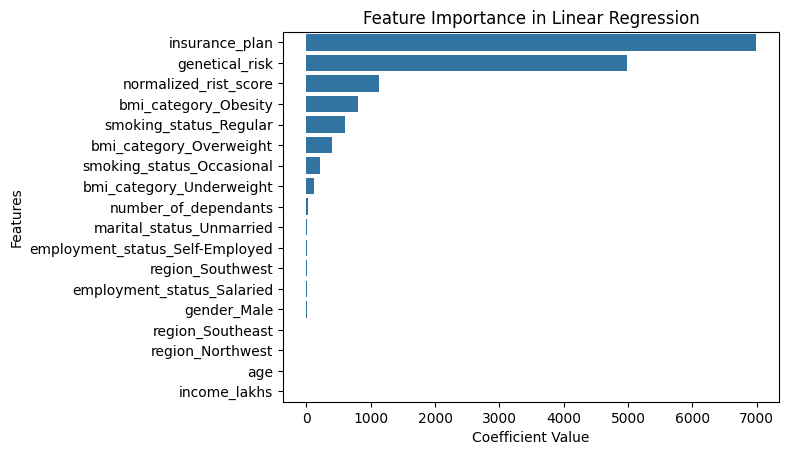

In [66]:
sns.barplot(data  = coeff_df , y = coeff_df.index, x = 'Coeffiecient')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Linear Regression')
plt.show()

### 6.2 Rigde Regression

- No Significate Improvement in the score

In [67]:
from sklearn.linear_model import Ridge,Lasso
model_ridge = Ridge(alpha=5)
model_ridge.fit(X_train,y_train)
train_score = model_ridge.score(X_train,y_train)
test_score = model_ridge.score(X_test,y_test)
train_score,test_score

(0.9884840165692809, 0.9882275471762074)

In [68]:
y_pred = model_ridge.predict(X_test)

mse_rg = mean_squared_error(y_test, y_pred)
rmse_rg = np.sqrt(mse_lr)
print("Ridge Regression ==> MSE: ", mse_rg, "RMSE: ", rmse_rg)

Ridge Regression ==> MSE:  89694.0788167958 RMSE:  299.06476130197746


### 6.3 XGBoost

In [69]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb .fit(X_train,y_train)
train_score = model_xgb .score(X_train,y_train)
test_score = model_xgb.score(X_test,y_test)
train_score,test_score

(0.9926241040229797, 0.9874040484428406)

In [70]:
y_pred = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBOOST ==> MSE: ", mse_xgb, "RMSE: ", rmse_xgb)

XGBOOST ==> MSE:  95968.5 RMSE:  309.78783061960326


#### 6.3.1 Hyperparameter Tuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV

model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9881282448768616)

In [72]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [73]:
best_model = model_lr
best_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### 6.3.2 Feature Importance
- Intrepretation is not as straight as Linear Model

In [74]:
feature_importane = best_model.coef_

coeff_df = pd.DataFrame(data = feature_importane, index=X_test.columns, columns=['Coeffiecient'])
coeff_df = coeff_df.sort_values(by=['Coeffiecient'],ascending=False)
coeff_df

,Coeffiecient
insurance_plan,6995.645756
genetical_risk,4983.675336
normalized_rist_score,1131.189849
bmi_category_Obesity,801.977884
smoking_status_Regular,607.368444
bmi_category_Overweight,404.437286
smoking_status_Occasional,207.656492
bmi_category_Underweight,113.743592
number_of_dependants,20.106931
marital_status_Unmarried,14.215531


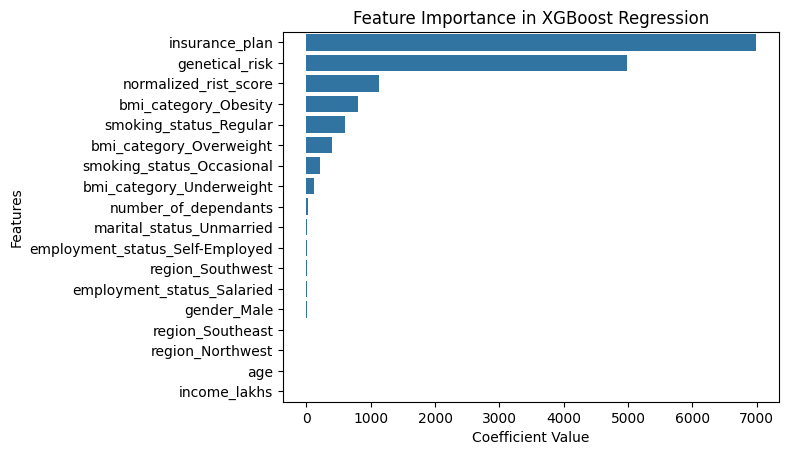

In [75]:
sns.barplot(data  = coeff_df , y = coeff_df.index, x = 'Coeffiecient')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost Regression')
plt.show()

## 7 Error Analysis

In [76]:
y_pred = best_model.predict(X_test)

residuals =y_pred - y_test
residuals_pct = residuals * 100 / y_test

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
10489,5452,5480.205181,28.205181,0.517336
7989,9658,9119.778377,-538.221623,-5.572806
3113,6031,5743.417104,-287.582896,-4.768411
10605,12386,12363.725254,-22.274746,-0.179838
4204,4245,4708.266672,463.266672,10.913231


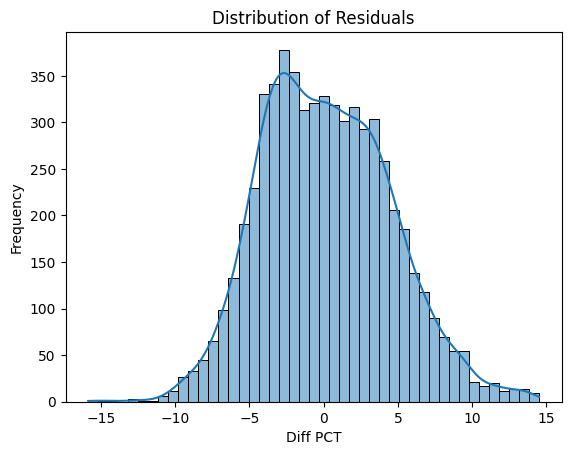

In [77]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [78]:
X_test.shape

(6026, 18)

### 7.1 More than 10% 

In [79]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
4204,4245,4708.266672,463.266672,10.913231
13142,4215,4693.834818,478.834818,11.360257
7802,4096,4519.165150,423.165150,10.331180
9881,3952,4404.757527,452.757527,11.456415
18329,4615,5106.885700,491.885700,10.658412


In [80]:
extreme_results_df.shape

(123, 4)

In [81]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

2.0411549950215733

- We have 2% extreme errors which means for 2% customers we will either overcharge or undercharge by 10% or more
- That means our model performs better now
    

### 7.2 More than 50%
- There will be about 0 customers whom we will overcharge or underchage by more than 50%

In [82]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,predicted,diff,diff_pct


### 7.3 More Analysis in Daya

In [83]:
X_test.index

Index([10489,  7989,  3113, 10605,  4204, 16419,  6534,  1712, 15712, 10360,
       ...
       12378,  2039,  1023,  8235, 18542, 18960,   266, 10036, 15506, 10890],
      dtype='int64', length=6026)

In [84]:
extreme_results_df.index

Index([ 4204, 13142,  7802,  9881, 18329,  6076, 18951,  6214,  3484, 17609,
       ...
        7596, 12493, 18146, 17205,  3803,  6345, 11264, 11302, 10807, 12143],
      dtype='int64', length=123)

In [85]:
extreme_error_df = X_test.loc[extreme_results_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_rist_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
4204,0.000000,0.000000,0.222222,0.0,0.0,0.000000,0,0,1,0,1,0,0,1,0,1,0,0
13142,0.571429,0.666667,0.070707,0.0,0.0,0.428571,0,0,0,1,0,0,0,0,1,0,1,0
7802,0.857143,1.000000,0.020202,0.0,0.0,0.357143,1,0,1,0,0,0,0,1,0,0,0,0
9881,0.714286,0.000000,0.040404,0.0,0.0,0.000000,1,0,0,0,1,0,1,0,0,0,1,0
18329,1.000000,0.000000,0.030303,0.0,0.2,0.000000,0,0,1,0,1,0,0,1,0,0,1,0


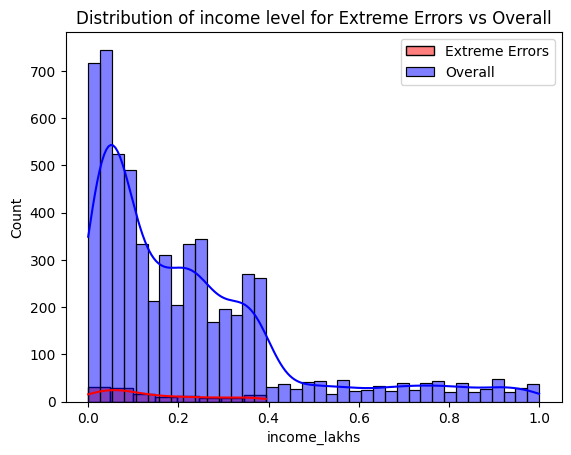

In [86]:
sns.histplot(extreme_error_df['income_lakhs'], color='red', label='Extreme Errors', kde=True)
sns.histplot(X_test['income_lakhs'], color='blue', label='Overall', alpha=0.5, kde=True)
plt.legend()
plt.title(f'Distribution of income level for Extreme Errors vs Overall')
plt.show()

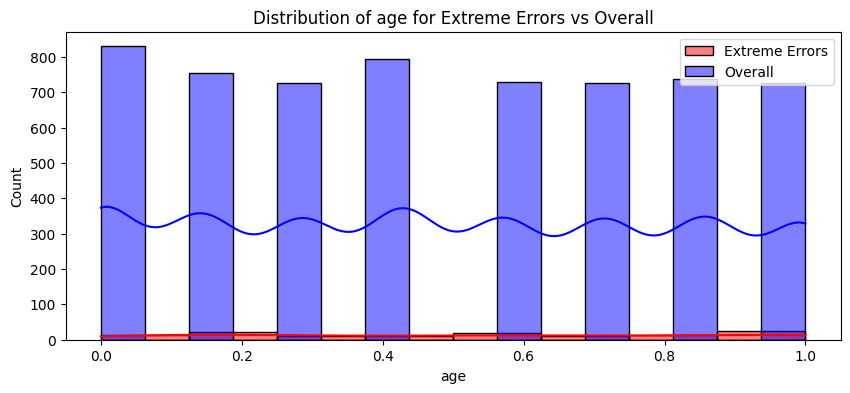

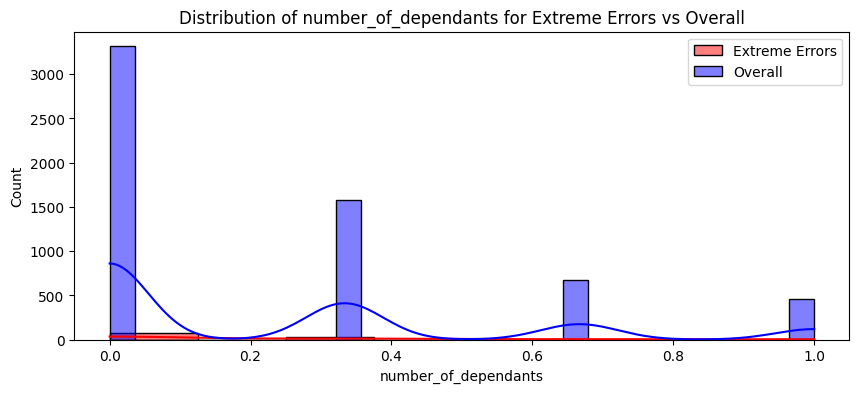

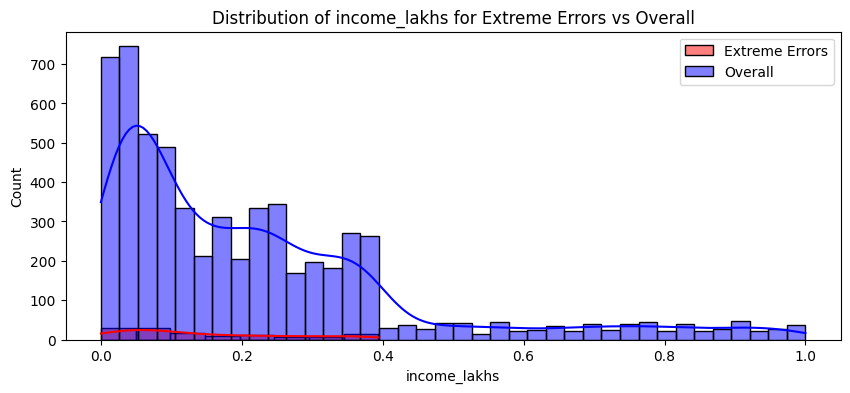

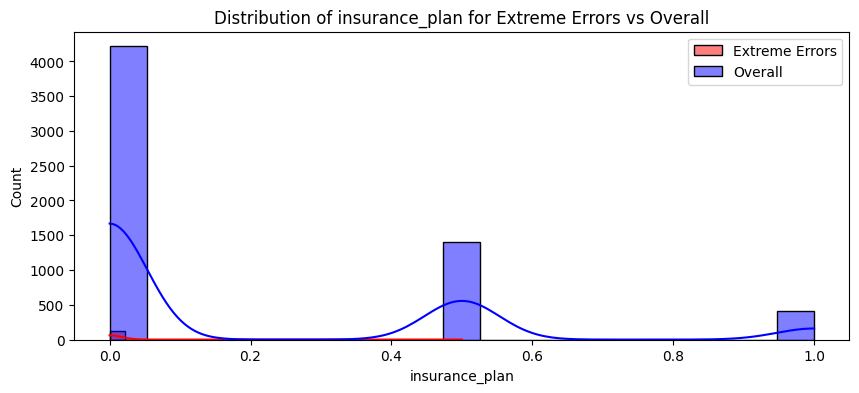

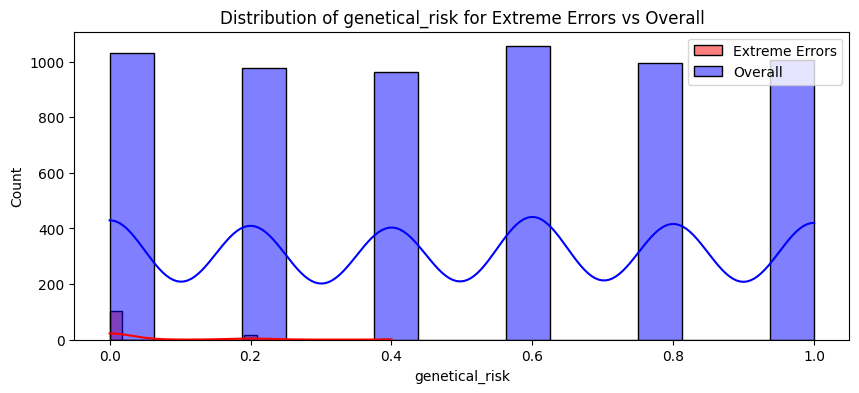

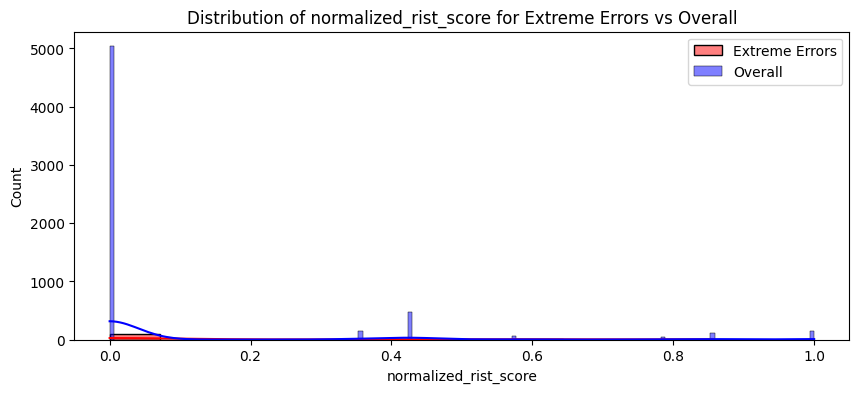

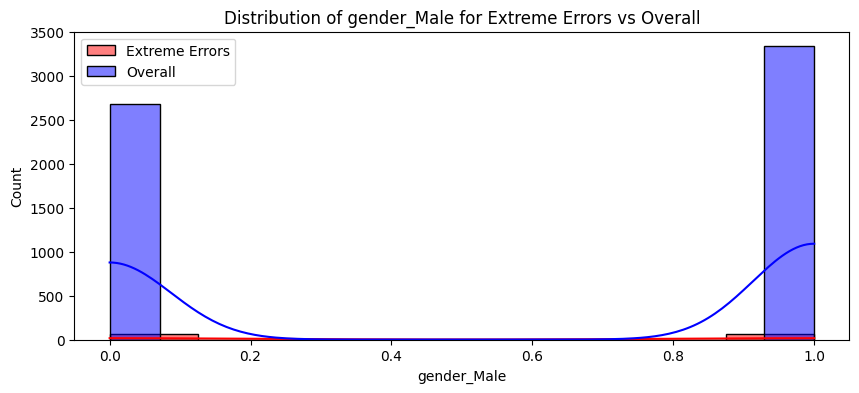

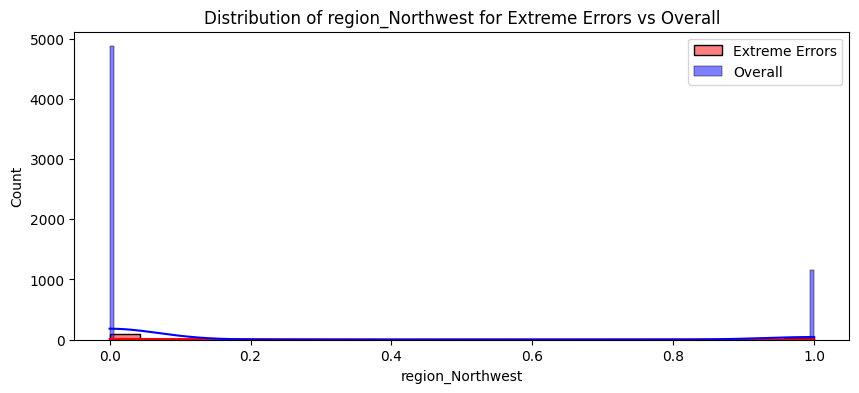

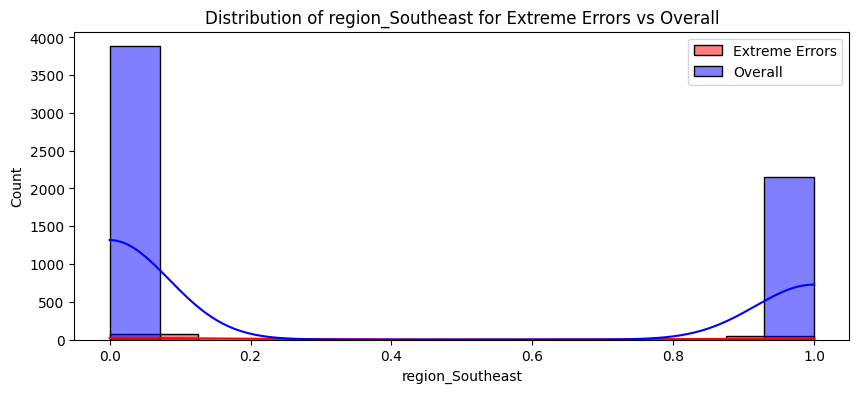

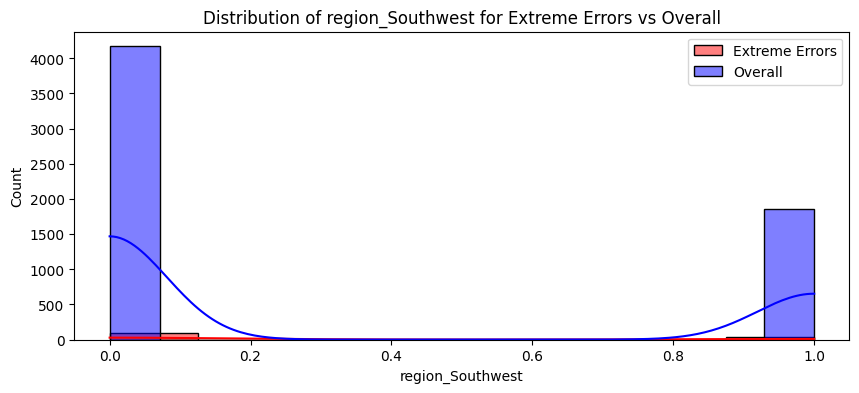

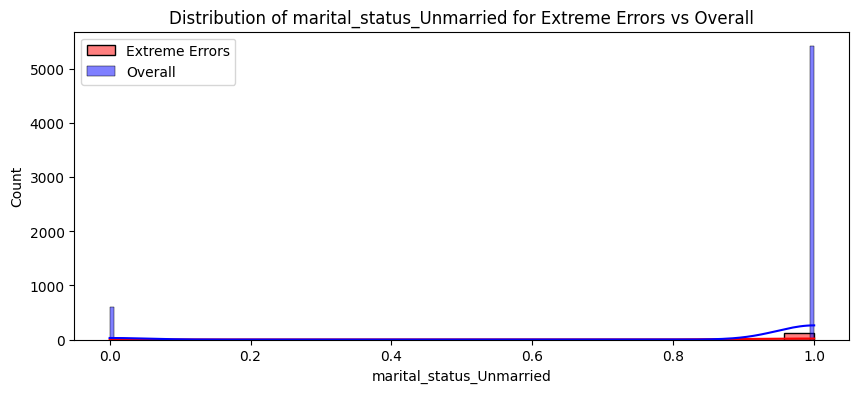

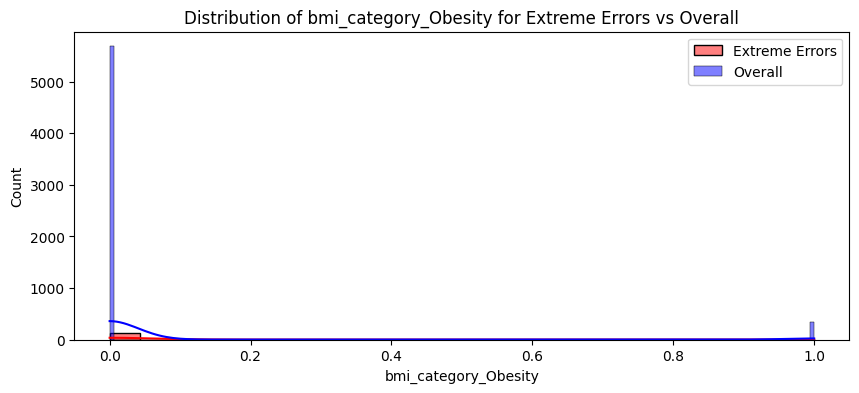

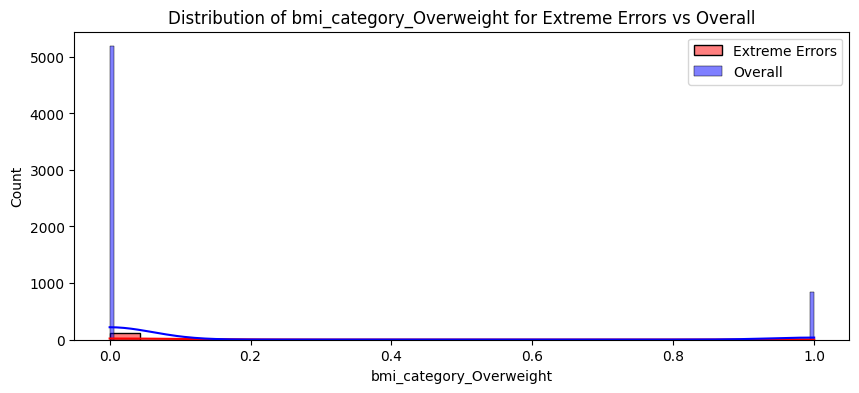

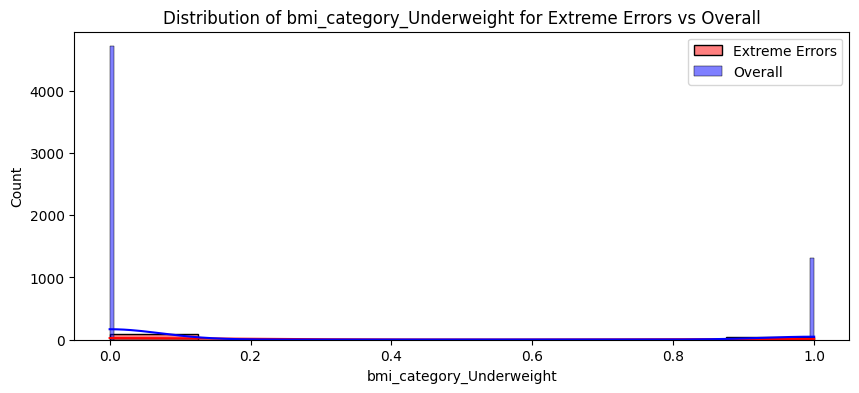

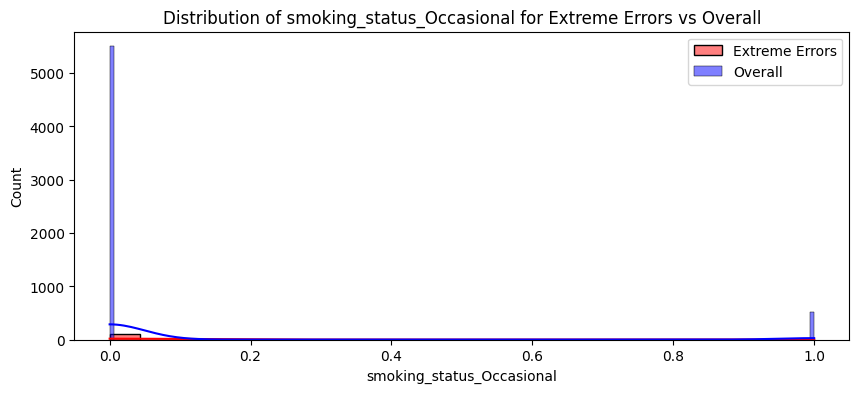

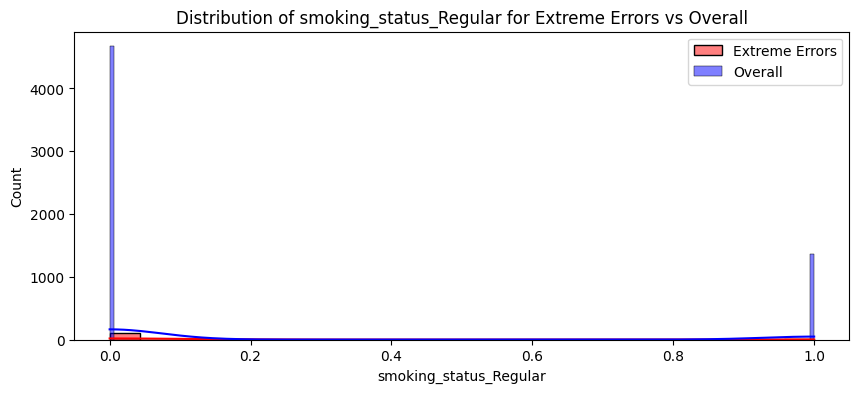

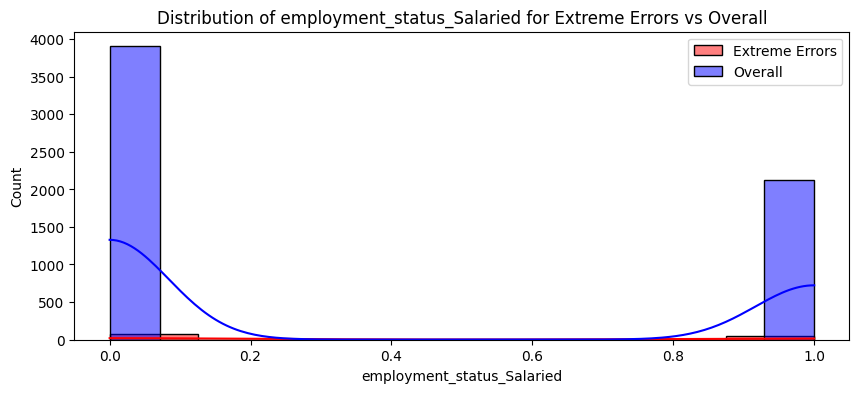

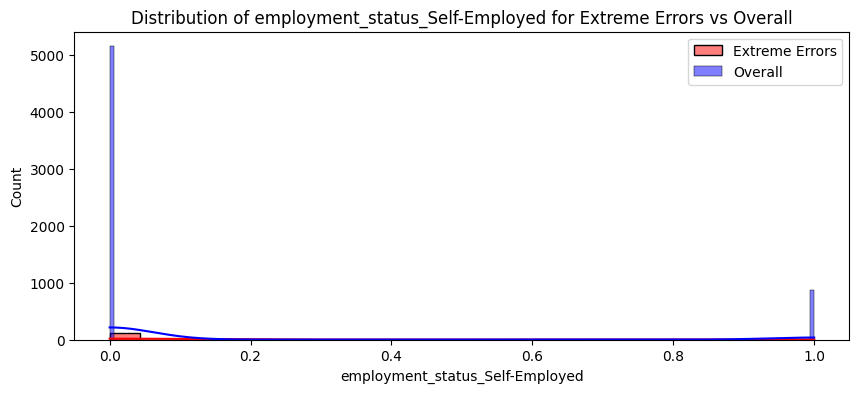

In [87]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_error_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

- Age showing that there is hue error in lower age group

<Axes: xlabel='age', ylabel='Count'>

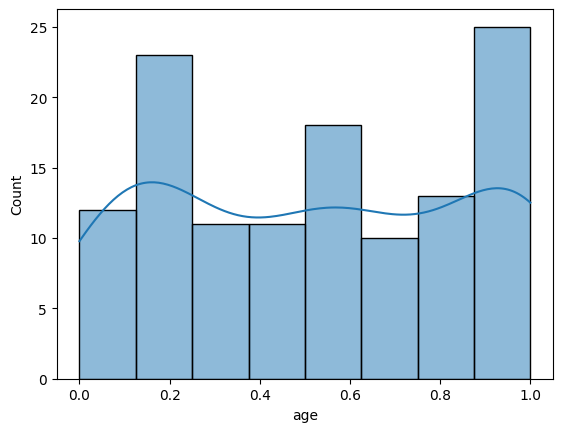

In [88]:
sns.histplot(extreme_error_df.age, kde=True   )

### 7.4 Reverse Scaling
- Scaling back using the same scaler
- Income Level was removed to need to keep back

In [89]:
extreme_error_df['income_level']=-1

In [90]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
0,18.0,0.0,-2.0,23.0,1.0,0.0
1,22.0,2.0,-2.0,8.0,1.0,0.0
2,24.0,3.0,-2.0,3.0,1.0,0.0
3,23.0,0.0,-2.0,5.0,1.0,0.0
4,25.0,0.0,-2.0,4.0,1.0,1.0


<Axes: xlabel='age', ylabel='Count'>

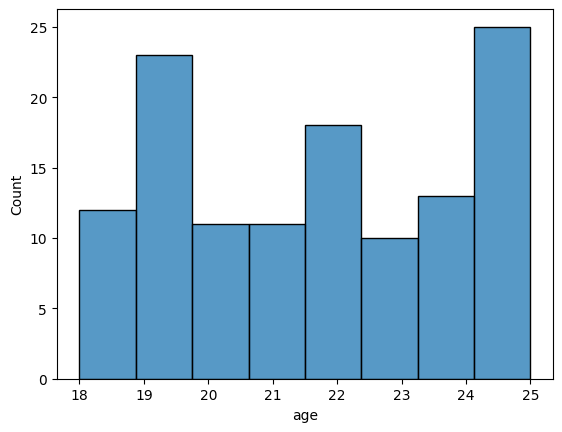

In [91]:
sns.histplot(df_reversed.age)

In [92]:
df_reversed.age.quantile(0.97)

np.float64(25.0)

- This shows that majority of the extreme errors are coming from young age group (i.e. <25 years of age). We need to may be build a separate model for this segment

## 8. Export Model

In [93]:
from joblib import dump

dump(best_model, "app/artifacts/model_young.joblib")

['app/artifacts/model_young.joblib']

In [94]:
scaler_with_cols ={
    'scaler':scaler,
    'cols_to_scale':cols_to_scale
}
scaler_with_cols

{'scaler': MinMaxScaler(),
 'cols_to_scale': ['age',
  'number_of_dependants',
  'income_level',
  'income_lakhs',
  'insurance_plan',
  'genetical_risk']}

In [95]:
dump(scaler_with_cols,'app/artifacts/scaler_young.joblib')

['app/artifacts/scaler_young.joblib']